[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://bit.ly/open-data-03-franchise-input)

## 소상공인시장진흥공단 상가업소정보로 프랜차이즈 입점분석

* 배스킨라빈스와 던킨도너츠는 근처에 입지한 것을 종종 볼 수 있었어요.
* 또, 파리바게뜨와 뚜레주르는 주변에서 많이 볼 수 있는 프랜차이즈 중 하나에요. 
* 이런 프랜차이즈 매장이 얼마나 모여 있는지 혹은 흩어져 있는지 지도에 직접 표시를 해보면서 대용량 데이터에서 원하는 특정 데이터를 추출해 보는 실습을 해봅니다.
* 추출한 데이터를 전처리하고 가공해서 원하는 형태로 시각화를 하거나 지도에 표현합니다.
* Python, Pandas, Numpy, Seaborn, Matplotlib, folium 을 통해 다양한 방법으로 표현하면서 파이썬의 여러 도구들에 익숙해 지는 것을 목표로 합니다.

### 다루는 내용
* 데이터 요약하기
* 공공데이터를 활용해 텍스트 데이터 정제하고 원하는 정보 찾아내기
* 문자열에서 원하는 텍스트 추출하기
* 문자열을 활용한 다양한 분석 방법과 위치 정보 사용하기
* folium을 통한 위경도 데이터 시각화 이해하기
* folium을 통해 지도에 분석한 내용을 표현하기 - CircleMarker와 MarkerCluster 그리기


### 데이터셋
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

## 필요한 라이브러리 불러오기

In [101]:
# pandas, numpy, seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #그래프에서 사이즈를 바꿔주거나 한글폰트 사용할 때 주로 사용하게 됨
# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

## 시각화를 위한 한글 폰트 설정하기

In [102]:
# 한글폰트 설정(Window/Mac)
plt.rc("font", family="Malgun Gothic")
#plr.rc("font", family="AppleGothic")
# 마이너스 부호 설정
plt.rc("axes", unicode_minus=False)

In [103]:
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

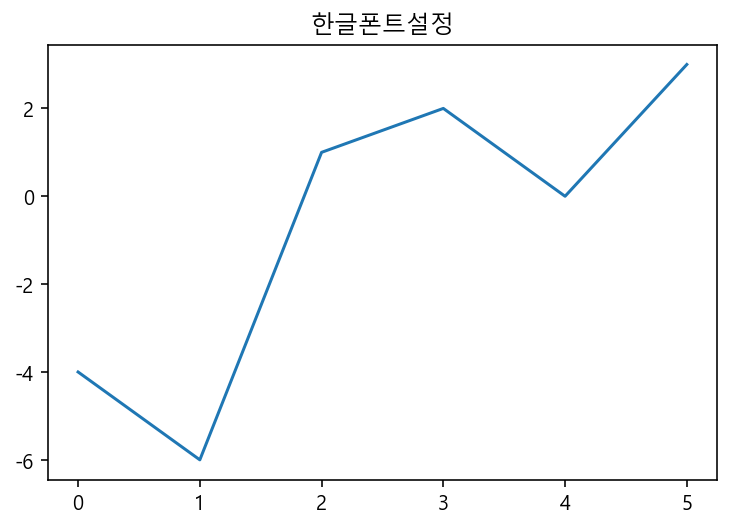

In [104]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트설정")
plt.plot([-4,-6,1,2,0,3])

## Google Colab 을 위한 코드
### Colab 에서 실행을 위한 코드

* 아래의 코드는 google colaboratory 에서 실행을 위한 코드로 로컬 아나콘다에서는 주석처리합니다.
* google colaboratory 에서는 주석을 풀고 폰트 설정과 csv 파일을 불러옵니다.

In [105]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

### Colab 용 GoogleAuth 인증 
* 구글 드라이브에 있는 파일을 가져오기 위해 사용합니다.

In [106]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [107]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1e91PH_KRFxNXUsx8Hi-Q2vPiorCDsOP4'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/상가업소정보_201912_01.csv')  

## 데이터 불러오기
* 공공데이터 포털 : https://www.data.go.kr/dataset/15012005/fileData.do
* 공공데이터 포털에서 소상공인시장진흥공단 상가업소정보를 다운로드 받아 사용했습니다
* 영상에 사용한 데이터셋 : http://bit.ly/open-data-set-folder (공공데이터포털에서 다운로드 받은 파일이 있습니다. 어떤 파일을 다운로드 받아야 될지 모르겠다면 여기에 있는 파일을 사용해 주세요.)

In [108]:
# 파일을 불러와 df 라는 변수에 담습니다.
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep="|")
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711


### 데이터 크기 보기

In [109]:
# shape 를 통해 불러온 csv 파일의 크기를 확인합니다.
df.shape

(573680, 39)

### info 보기

In [110]:
# info 를 사용하면 데이터의 전체적인 정보를 볼 수 있습니다.
# 데이터의 사이즈, 타입, 메모리 사용량 등을 볼 수 있습니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

<AxesSubplot:>

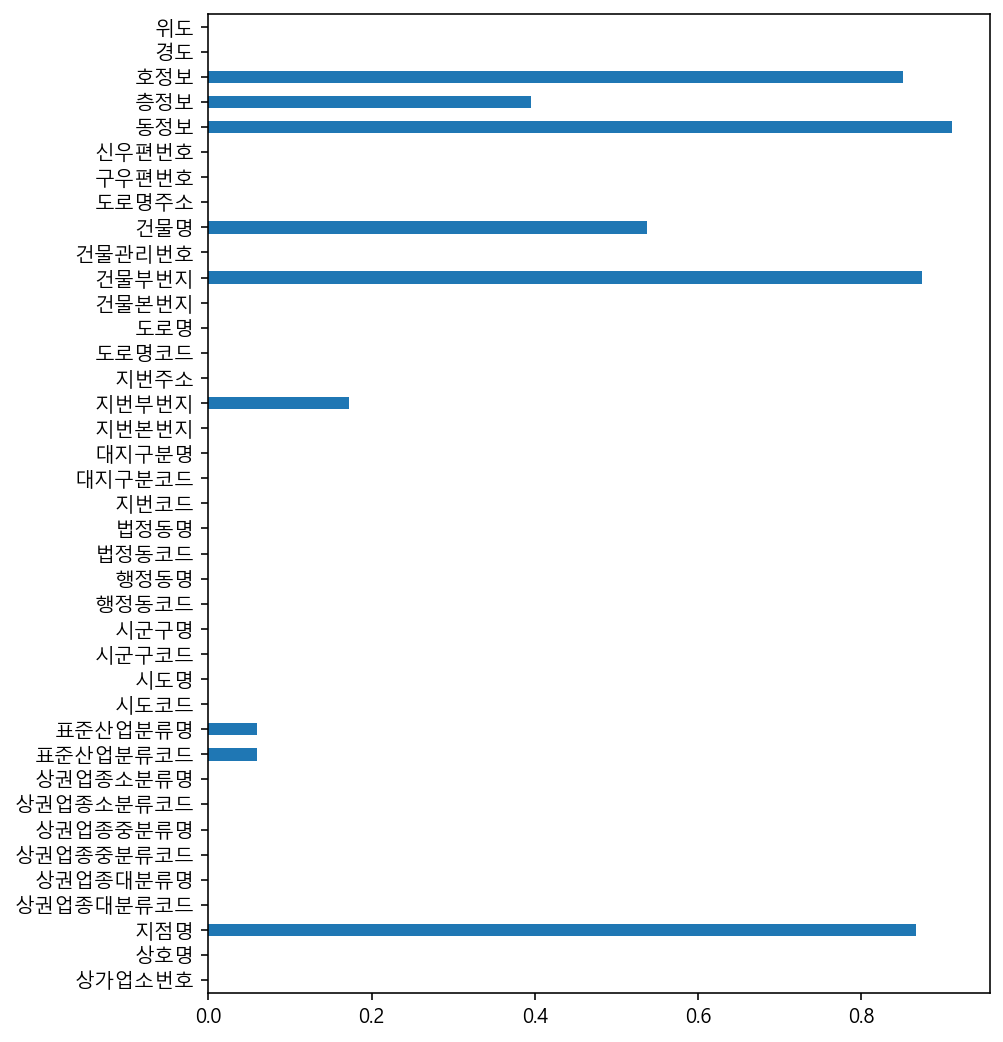

In [111]:
# isnull() 을 사용하면 데이터의 결측치를 볼 수 있습니다.(isna()도 가능)
# 결측치는 True로 값이 있다면 False로 표시되는데 True 는 1과 같기 때문에 
# True 값을 sum()을 사용해서 더하게 되면 합계를 볼 수 있습니다.
# mean()을 사용하면 결측치의 비율을 볼 수 있습니다.
df.isnull().sum()
df.isnull().mean()
df.isnull().mean().plot.barh(figsize=(7,9))

### 사용하지 않는 컬럼 제거하기

In [112]:
# drop을 하는 방법도 있지만 사용할 컬럼만 따로 모아서 보는 방법도 있습니다.
# 여기에서는 사용할 컬럼만 따로 모아서 사용합니다.
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
df = df[columns].copy()
df.shape

(573680, 11)

In [113]:
# 제거 후 메모리 사용량 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기
### 서울만 따로 보기

In [114]:
# 시도명이 서울로 시작하는 데이터만 봅니다.
# 또, df_seoul 이라는 변수에 결과를 저장합니다.
# 새로운 변수에 데이터프레임을 할당할 때 copy()를 사용하는 것을 권장합니다.
df_seoul = df[df["시도명"] == "서울특별시"].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [115]:
# unique 를 사용하면 중복을 제거한 시군구명을 가져옵니다. 
# 그리고 shape로 갯수를 출력해 봅니다.
df_seoul["시군구명"].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

In [116]:
# nunique 를 사용하면 중복을 제거한 시군구명의 갯수를 세어줍니다.
df_seoul["시군구명"].nunique()

25

## 파일로 저장하기
* 전처리한 파일을 저장해 두면 재사용을 할 수 있습니다.
* 재사용을 위해 파일로 저장합니다.

In [117]:
# "seoul_open_store.csv" 라는 이름으로 저장합니다.
df_seoul.to_csv("seoul_open_store.csv", index=False, encoding="cp949") # index=True가 기본값으로 인덱스가 변수로 저장되어서 index=False 해주는 것

In [118]:
# 제대로 저장이 되었는지 같은 파일을 불러와서 확인합니다.
pd.read_csv("seoul_open_store.csv", encoding="cp949").head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711


## 배스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기
* 여기에서는 배스킨라빈스와 던킨도너츠 상호를 가져와서 실습합니다.
* 위에서 pandas의 str.conatains를 활용해 봅니다.
* https://pandas.pydata.org/docs/user_guide/text.html#testing-for-strings-that-match-or-contain-a-pattern

* 상호명에서 브랜드명을 추출합니다.
* 대소문자가 섞여 있을 수도 있기 때문에 대소문자를 변환해 줍니다.
* 오타를 방지하기 위해 배스킨라빈스의 영문명은 baskinrobbins, 던킨도너츠는 dunkindonuts 입니다.

In [119]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [120]:
# baskinrobbins 를 "상호명_소문자" 컬럼으로 가져옵니다.
# 띄어쓰기 등의 다를 수 있기 때문에 앞글자 baskin 만 따서 가져오도록 합니다.
# '상호명_소문자'컬럼으로 '배스킨라빈스|baskin' 를 가져와 갯수를 세어봅니다.
# loc[행]
# loc[행, 열]

df_seoul[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins")].shape
# df_seoul["상호명_소문자"].str.extract("(베/배)스킨라빈스|baskinrobbins")[0].value_counts() ->베/배 각각 따로 추출
# (베/배)같이 괄호쓰면서 정규식의 표현을 쓰려면 원래 str.extract를 권장함
# 그러나 여기서는 따로 추출할 필요가 없기 때문에 str.contains를 사용. 정규식도 안쓰고 그냥 나열해서 써주기로 함
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "상호명_소문자"].shape

(466,)

In [121]:
# 상호명에서 던킨도너츠만 가져옵니다.
# 상호명은 소문자로 변경해 준 컬럼을 사용합니다.
# 던킨|dunkin 의 "상호명_소문자"로 갯수를 세어봅니다.
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), "상호명_소문자"].shape

(191,)

In [122]:
# '상호명_소문자'컬럼으로  '배스킨|베스킨|baskin|던킨|dunkin'를 가져와 df_31 변수에 담습니다.
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin")].copy()
df_31.shape

(657, 12)

In [123]:
# '브랜드명'이라는 컬럼에 ('배스킨라빈스|베스킨라빈스|baskinrobbins')을 포함하는 상호명의 값들을 "배스킨라빈스"값으로 넣어주기 
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "배스킨라빈스"
# 'df_31에 담긴 상호명','브랜드명'으로 미리보기를 합니다.
df_31[["상호명","브랜드명"]]

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN
...,...,...
558894,DUNKINDOONUTS,NaN
560984,던킨도너츠,NaN
561929,배스킨라빈스31,배스킨라빈스
561930,배스킨라빈스31,배스킨라빈스


In [124]:
# ~은 not을 의미합니다. 베스킨라빈스가 아닌 데이터를 찾을 때 사용하면 좋습니다.
#df_31.loc[~df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), "브랜드명"] = "던킨도너츠"
# 위의 코드와 다르게 'fillna()'를 사용해서 결측치를 던킨도너츠로 채워줘도 괜찮습니다.(결측치를 대체하는 값)
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠") # (위의 코드와 다르게)할당을 꼭 해줘야 실제로 채워지게 됨. 
df_31["브랜드명"]

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [125]:
# 데이터가 제대로 모아졌는지 확인합니다.
# "상권업종대분류명"을  value_counts 를 통해 빈도수를 계산합니다.
df_31["상권업종대분류명"].value_counts()

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [126]:
# "상권업종대분류명"컬럼에서 isin 기능을 사용해서 "소매", "생활서비스" 인 데이터만 가져옵니다.
df_31[df_31["상권업종대분류명"].isin(["소매","생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [127]:
# ~를 사용하여 "상권업종대분류명"에서 "소매", "생활서비스"는 제외합니다.
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매","생활서비스"])].copy()
df_31.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠테크노마트점,던킨도너츠


### 범주형 값으로 countplot 그리기

In [128]:
# value_counts 로 "브랜드명"의 빈도수를 구합니다.
df_31["브랜드명"].value_counts()

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

In [129]:
# normalize=True 로 ("브랜드명"의)빈도수의 비율을 구합니다.
df_31["브랜드명"].value_counts(normalize=True)

배스킨라빈스    0.708397
던킨도너츠     0.291603
Name: 브랜드명, dtype: float64

In [130]:
# 아래 countplot 그릴 때 text 기능을 위해서 brand_count 변수("브랜드명"의 값과 해당 빈도수가 들어있는) 만들기
# brand_count 변수에는 "브랜드명"의 값이 index가 되고, 값의 해당 빈도수가 values인 series 형태
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

Text(1, 191, '191')

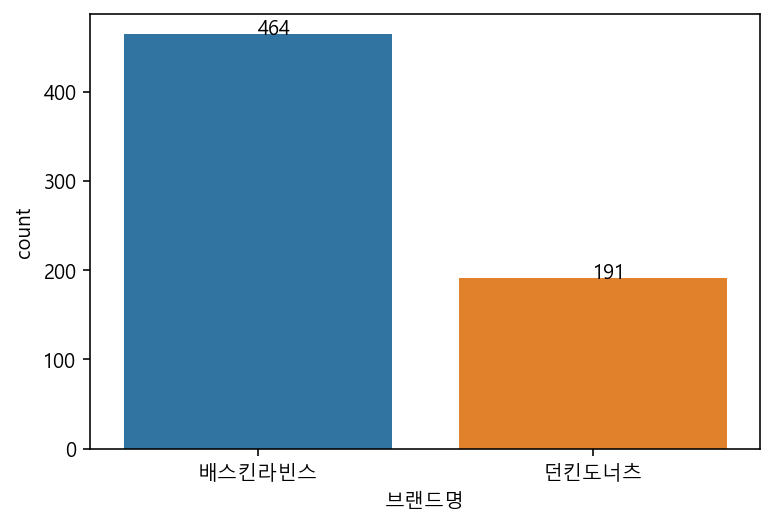

In [131]:
# countplot 을 그립니다.
g = sns.countplot(data=df_31, x="브랜드명")
g.text(x=0, y=brand_count[0], s=brand_count[0])
g.text(x=1, y=brand_count[1], s=brand_count[1])

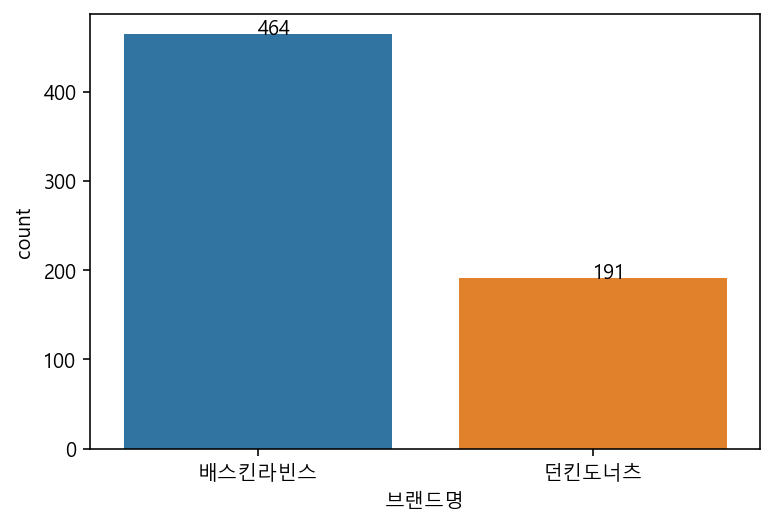

In [132]:
# 위의 코드를 for문으로 (지금 "브랜드명"은 갯수가 2개라서 괜찮지만 "시군구명"같이 많을 경우에는 for문을 사용하는 게 효율적!)
g = sns.countplot(data=df_31, x="브랜드명")
for i, val in enumerate(brand_count):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

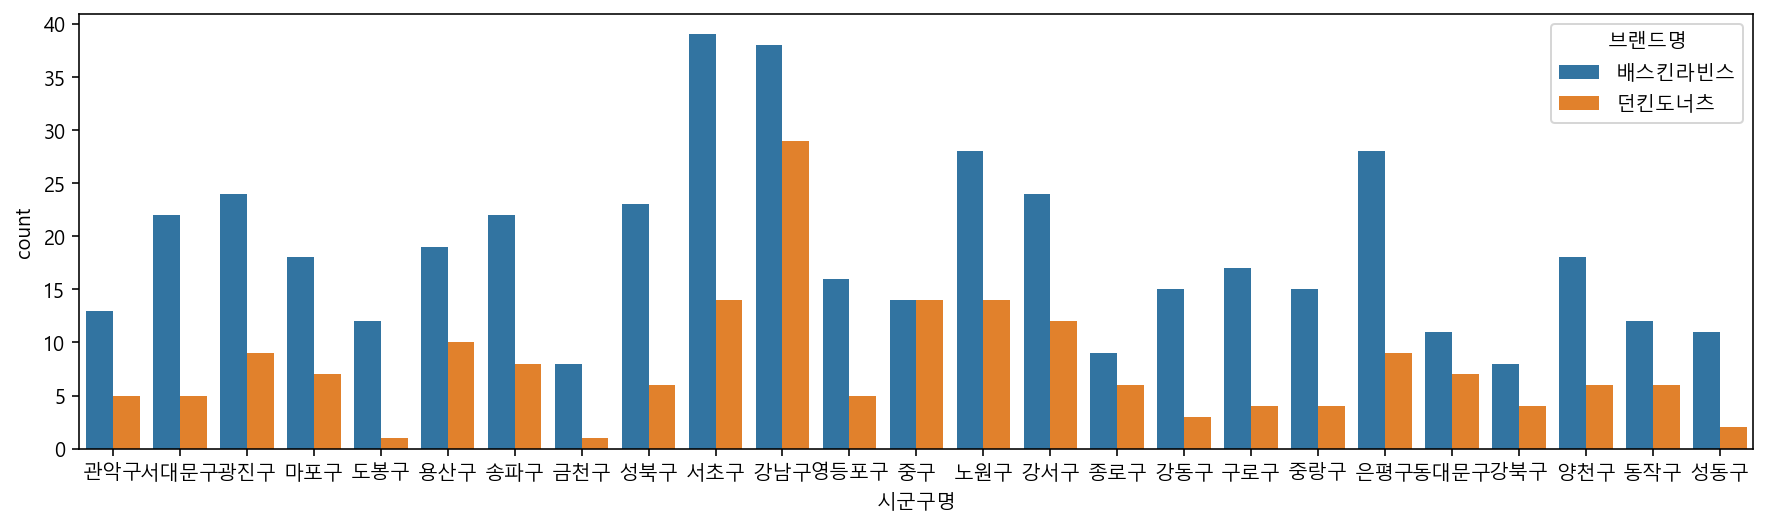

In [133]:
# 시군구명으로 빈도수를 세고 브랜드명으로 색상을 다르게 표현하는 countplot 을 그립니다.
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

KeyError: 0

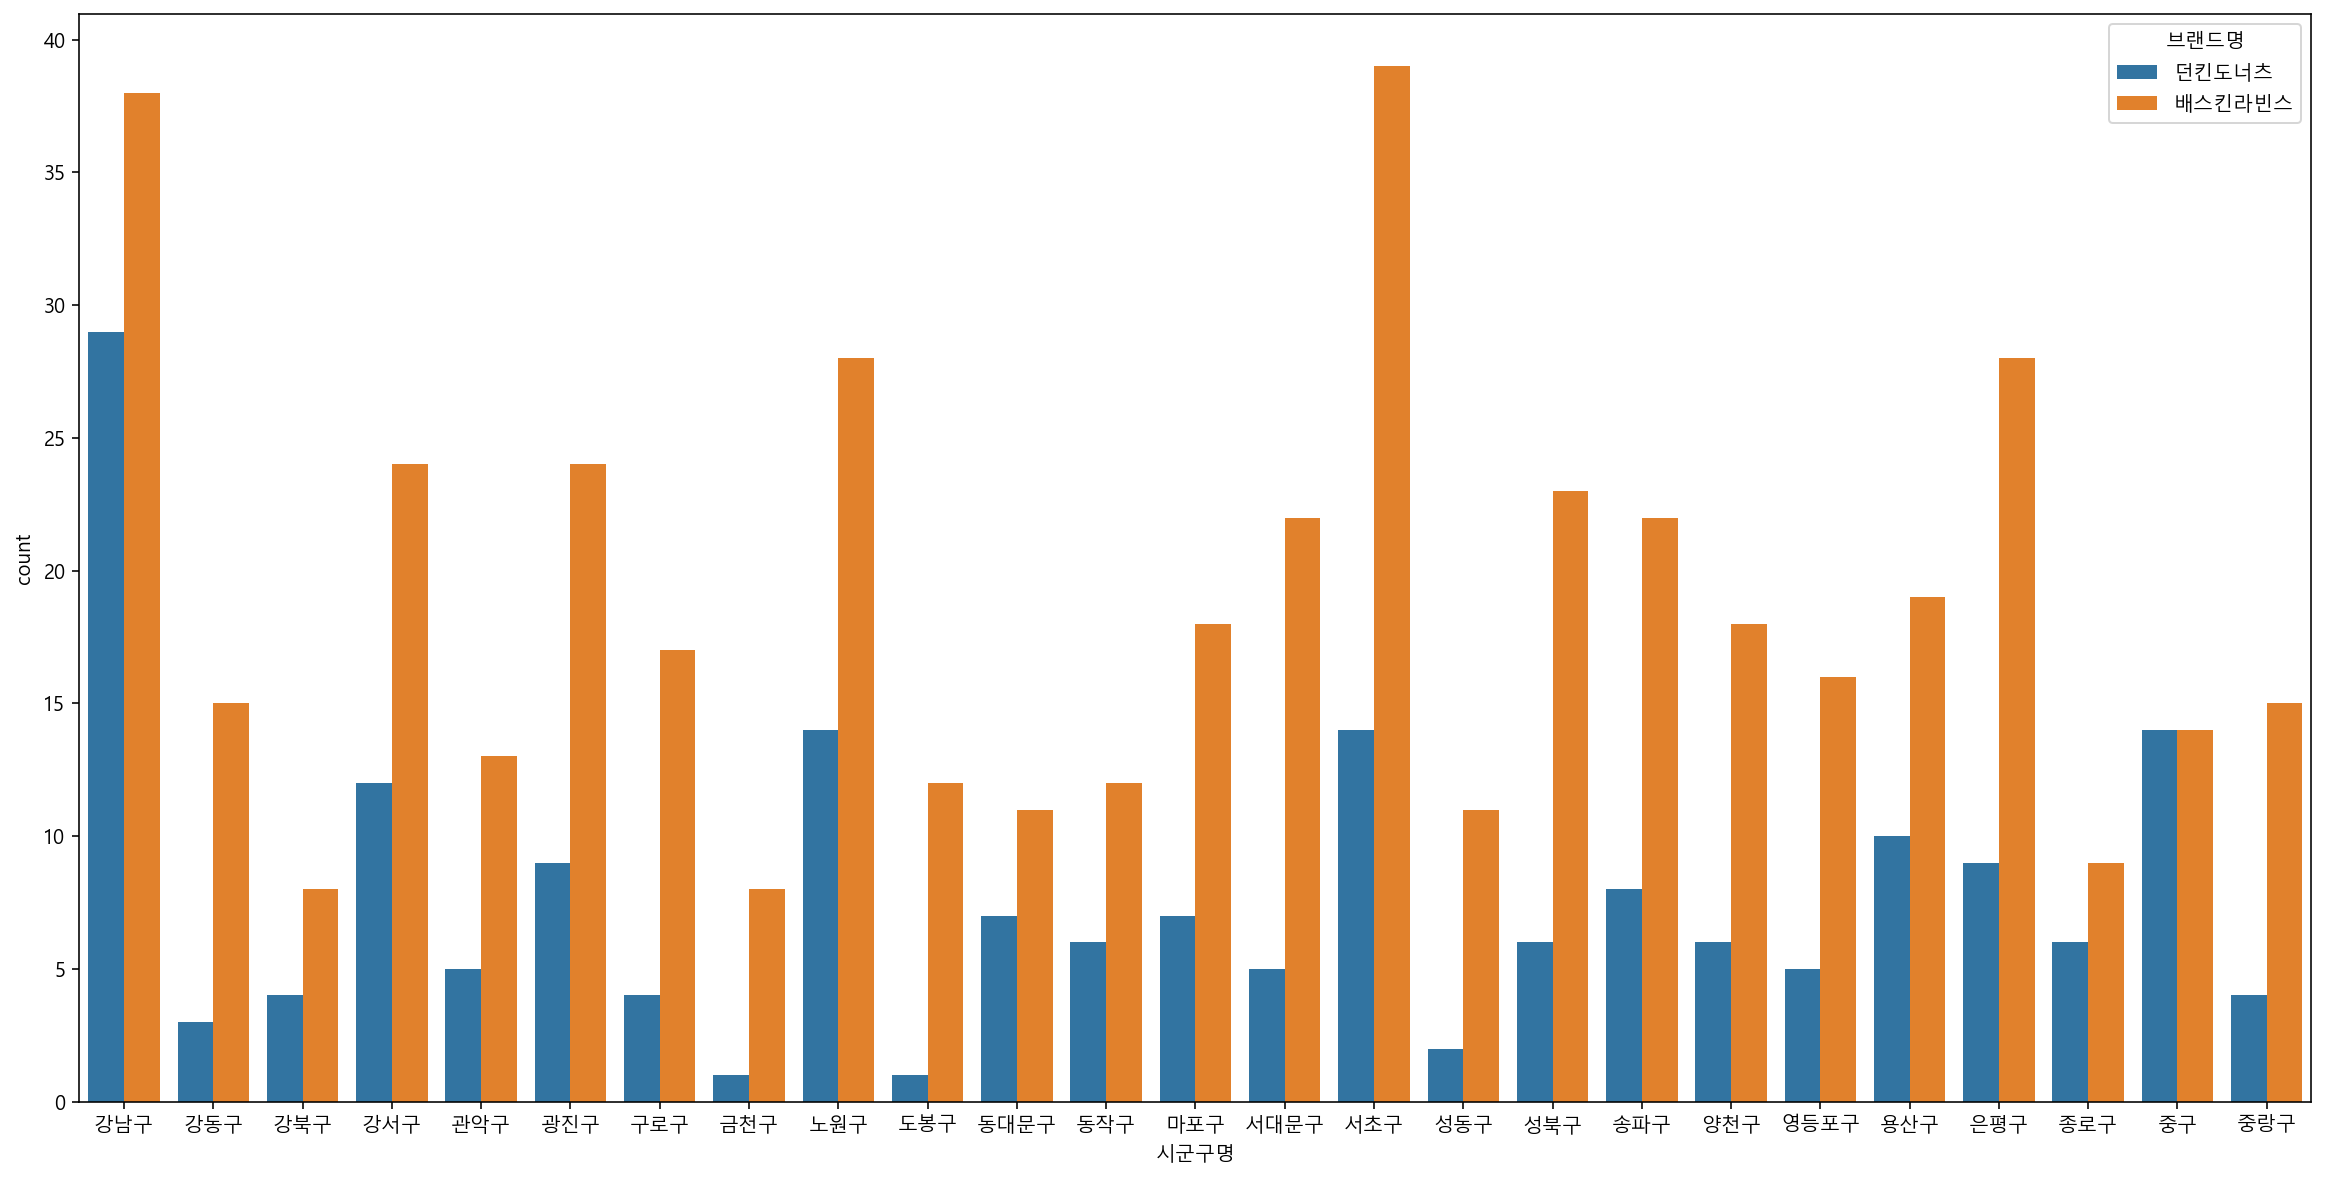

In [136]:
# 위의 그래프에서도 text를 표시하고 싶어서 혼자 해봄. (그런데 text가 옆으로 삐져나오는 문제 잇음.ㅠ)
a= df_31.groupby(["시군구명","브랜드명"])["상호명"].count().unstack()
plt.figure(figsize=(20,10))
b = sns.countplot(data=df_31.sort_values("시군구명"), x="시군구명", hue="브랜드명")
for i, val in enumerate(a):
    b.text(x=i,y=a[i],s=a[i])

# (text가 옆으로 나오는 문제 질문에 대한 선생님 답변)
# x, y 좌표값을 조정해 보면서 그려보세요.
# x 축 좌표값에 더하기 빼기를 넣어서 숫자를 조정해 보세요.
# text 사용법에 대한 내용이 있으니 참고해 보세요.
# https://www.youtube.com/watch?v=TxpSifRXyAw

### scatterplot 그리기

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#scatter-plot

<AxesSubplot:xlabel='경도', ylabel='위도'>

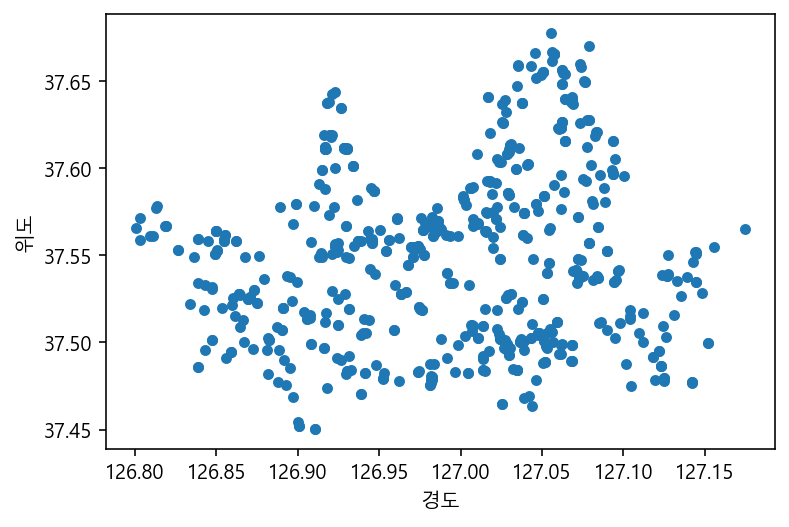

In [35]:
# Pandas 의 plot 으로 scatterplot 을 그립니다.
df_31[["위도","경도"]].plot.scatter(x="경도",y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

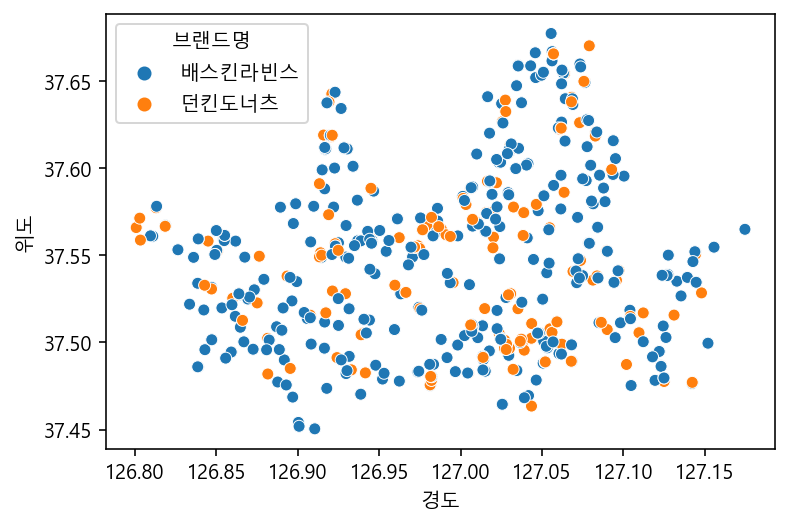

In [36]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

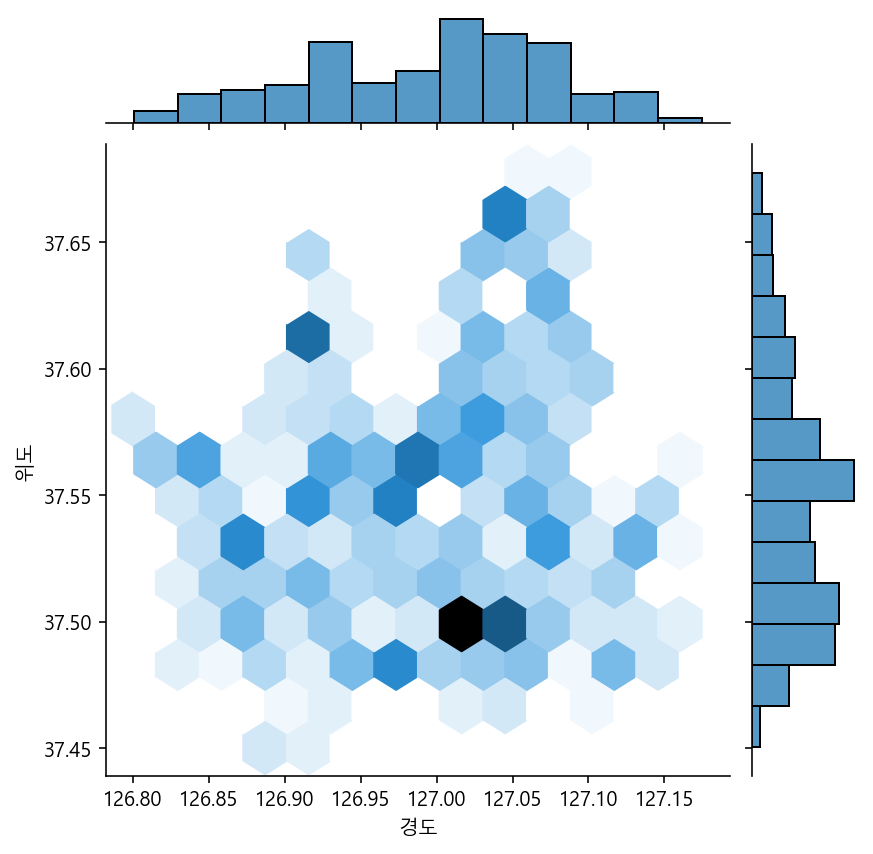

In [37]:
# 위에서 그렸던 그래프를 jointplot 으로 kind="hex" 을 사용해 그려봅니다.
# jointplot은 기본값(kind=scatter)으로 scatterplot과 histogram을 같이 그려줌 
# kind="hex"를 해주면 scatter과 histogram을 같이 표현해주는 hexagonalbinplot그려줌 
# (scatterplot처럼 위치를 찍어주면서, 색깔로 빈도수의 많고 적음을 나타내줌 )
sns.jointplot(data=df_31, x="경도", y="위도", kind="hex") 

## Folium 으로 지도 활용하기
* 다음의 프롬프트 창을 열어 conda 명령어로 설치합니다.
<img src="https://i.imgur.com/x7pzfCP.jpg">
* <font color="red">주피터 노트북 상에서 설치가 되지 않으니</font> anaconda prompt 를 열어서 설치해 주세요.


* 윈도우
    * <font color="red">관리자 권한</font>으로 아나콘다를 설치하셨다면 다음의 방법으로 anaconda prompt 를 열어 주세요.
    <img src="https://i.imgur.com/GhoLwsd.png">
* 맥
    * terminal 프로그램을 열어 설치해 주세요. 


* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [38]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리
import folium

In [39]:
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다. 
lat = df_31["위도"].mean()
long = df_31["경도"].mean()

In [40]:
# folium 사용법을 보고 일부 데이터를 출력해 봅니다.
# 샘플을 하나 추출해서 지도에 표시해 봅니다.
df_31.sample(random_state=31) #random_state를 넣어주면 고정된 값이 나옴(안하면 샘플링되어서 계속 다른 값 나옴) 

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
276889,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 논현로 341,127.039032,37.495593,던킨도너츠,던킨도너츠


In [41]:
# 추출한 샘플을  지도에 표시해 봅니다.
m = folium.Map(location=[lat, long])
folium.Marker([37.495593,127.03903237], tooltip="던킨도너츠").add_to(m)
m

In [42]:
# html 파일로 저장하기
# tooltip 의 한글이 깨져보인다면 html 파일로 저장해서 보세요.
m.save("index.html")

### 서울의 배스킨라빈스와 던킨도너츠 매장 분포
* 배스킨라빈스와 던킨도너츠 매장을 지도에 표현합니다.

In [43]:
# 데이터프레임의 인덱스만 출력합니다.
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

### 기본 마커로 표현하기

In [44]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
m = folium.Map(location=[lat, long], zoom_start=12)
for i in df_31.index[:10]: #로딩이 오래걸려서 10개정도만 갖고옴
    sub_lat = df_31.loc[i,"위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "브랜드명"]+" - "+df_31.loc[i,"도로명주소"]
    icon_color = "blue"
    if df_31.loc[i,"브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker([sub_lat,sub_long], 
                  icon=folium.Icon(color=icon_color),
                  popup=f'<i>{title}</i>',
                  tooltip=title).add_to(m)
    
m.save("index.html")
m

### MarkerCluster 로 표현하기
* 근처에 있는 것들을 클러스터로 묶어줌
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [45]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
import folium
from folium.plugins import MarkerCluster
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
m = folium.Map(location=[lat, long], zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

for i in df_31.index: #
    sub_lat = df_31.loc[i,"위도"]
    sub_long = df_31.loc[i, "경도"]
    title = df_31.loc[i, "브랜드명"]+" - "+df_31.loc[i,"도로명주소"]
    icon_color = "blue"
    if df_31.loc[i,"브랜드명"] == "던킨도너츠":
        icon_color = "red"
    
    folium.Marker([sub_lat,sub_long], 
                  icon=folium.Icon(color=icon_color),
                  popup=f'<i>{title}</i>',
                  tooltip=title).add_to(marker_cluster)
    
m.save("index.html")
m

## 파리바게뜨와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [46]:
# 이 셀 아래있는 셀의 코드를 실행하면 (주|쥬), (바게|크라상) 같이 정규식을 사용했기에 str.contains말고 str.extract를 쓰라고 하는 메세지가 뜸
# str.extract는 (주|쥬)를 '쥬'와 '주'로, (바게|크라상)을 '바게'와 '크라상'으로 나뉘어서 빈도수를 보여줌 
# 그런데, 지금은 이렇게 나누는 것이 필요한 게 아님. 이러한 문자가 포함된 것을 찾아야 하므로 str.contains를 써야 함 
df_seoul["상호명"].str.extract("뚜레(주|쥬)르")[0].value_counts()

쥬    257
주      1
Name: 0, dtype: int64

In [47]:
# str.contains 를 사용해서 뚜레(주|쥬)르|파리(바게|크라상) 으로 상호명을 찾습니다.
# df_bread 라는 데이터프레임에 담습니다.
df_bread = df_seoul[df_seoul["상호명"].str.contains("뚜레(주|쥬)르|파리(바게|크라상)")].copy()
df_bread.shape

C:\anaconda\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(825, 12)

### 가져온 데이터가 맞는지 확인하기

In [48]:
# 잘못 가져온 데이터가 있는지 확인합니다.
df_bread["상권업종대분류명"].value_counts()

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [49]:
# 제과점과 상관 없을 것 같은 상점을 추출합니다.
df_bread[df_bread["상권업종대분류명"] == "학문/교육"]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
354693,파리바게뜨교육소,학문/교육,학원-자격/국가고시,학원-제과기술,서울특별시,영등포구,영등포동,영등포동8가,서울특별시 영등포구 영중로 159,126.905405,37.530553,파리바게뜨교육소
406627,뚜레쥬르,학문/교육,학원-자격/국가고시,학원-제과기술,서울특별시,금천구,가산동,가산동,서울특별시 금천구 가산디지털1로 128,126.883684,37.477224,뚜레쥬르


In [50]:
# "상권업종대분류명"이 "학문/교육"이 아닌 것만 가져옵니다.
print(df_bread.shape)
df_bread = df_bread[df_bread["상권업종대분류명"] != "학문/교육"].copy()
print(df_bread.shape)

(825, 12)
(823, 12)


In [51]:
# 상호명의 unique 값을 봅니다.
df_bread["상호명"].unique()

array(['뚜레쥬르', '파리바게뜨길동사거리점', '파리바게뜨상계제일점', '뚜레쥬르중계브라운', '파리바게뜨-판매옥수점',
       '파리바게뜨당고개점', '파리바게뜨목동오거리점', '뚜레쥬르신당역점', '파리바게뜨', '파리바게뜨서강신수점',
       '파리크라상', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점', '파리바게뜨종로구기',
       '뚜레쥬르왕십리민자역사점왕십리민자역사점', '파리크라상교대역점', '뚜레쥬르도선사거리점', '여의도2호파리크라상',
       '목동파리크라상', '뚜레쥬르개봉역점', '파리바게뜨외대점', '파리크라상파스쿠찌홍', '파리크라상파스쿠찌압',
       'CJ뚜레쥬르', '신목파리바게뜨', '방주산업뚜레쥬르광화문경희궁의', '파리크라상파스쿠찌서', '파리크라상파스쿠찌도',
       '강동경희파리바게뜨', '파리크라상이대점', '파리크라상파스쿠찌압구정역2호', '뚜레쥬르송천센트레빌점',
       '파리크라상잠바주스디큐브', '파리크라상잠바주스대치역', '파리바게트', '상계뚜레쥬르', '뚜레쥬르대림3동점',
       '뚜레쥬르목4동점', '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '뚜레쥬르독산지식센터점',
       '파리바게뜨수락리버시티', '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '뚜레쥬르방화역점', '파리바게뜨중앙대점',
       '뚜레쥬르레이크펠리스점', '파리바게뜨장안현대점', '뚜레쥬르우이점', '파리바게뜨성북점', '뚜레쥬르양천푸른점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '뚜레쥬르엔시티보라매', '파리바게뜨종로시그니처점',
       '파리바게뜨상계보람점', '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점',
       '뚜레쥬르창동SM마트', '파리바게뜨카페대학로점', '파리바게뜨대림역점', '파리바게뜨월계미성', '파리크라상서래점',
       '파리바게뜨금천한양점', '씨

In [52]:
# 상호명이 '파스쿠찌|잠바주스'가 아닌 것만 가져오세요. (위에서 보니, '파리크라상파스쿠찌~~점', '파리크라상잠바주스~~점'이러한 상호명들이 있어서)
print(df_bread.shape)
df_bread = df_bread[~df_bread["상호명"].str.contains("파스쿠찌|잠바주스")].copy()
print(df_bread.shape)

(823, 12)
(812, 12)


In [53]:
# 브랜드명 컬럼을 만듭니다. "파리바게뜨" 에 해당되는 데이터에 대한 값을 채워줍니다.
df_bread.loc[df_bread["상호명"].str.contains("파리바게"), "브랜드명"] = "파리바게뜨"
df_bread.loc[df_bread["상호명"].str.contains("파리크라상"), "브랜드명"] = "파리바게뜨"
# 브랜드명 컬럼을 만듭니다. "뚜레쥬르" 에 해당되는 데이터에 대한 값을 채워줍니다.
df_bread.loc[df_bread["상호명"].str.contains("뚜레"), "브랜드명"] = "뚜레쥬르"

In [173]:
# "상호명"과 "브랜드명"을 확인해봅니다. 
df_bread[['상호명','브랜드명']].head(3)

,상호명,브랜드명
2935,뚜레쥬르,뚜레쥬르
13843,뚜레쥬르,뚜레쥬르
14031,파리바게뜨길동사거리점,파리바게뜨


### 범주형 변수 빈도수 계산하기

In [54]:
# 브랜드명의 빈도수를 봅니다.
df_bread['브랜드명'].value_counts()

파리바게뜨    555
뚜레쥬르     257
Name: 브랜드명, dtype: int64

In [55]:
df_bread['브랜드명'].value_counts(normalize=True) # 퍼센트로 빈도수의 분포확인 

파리바게뜨    0.683498
뚜레쥬르     0.316502
Name: 브랜드명, dtype: float64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

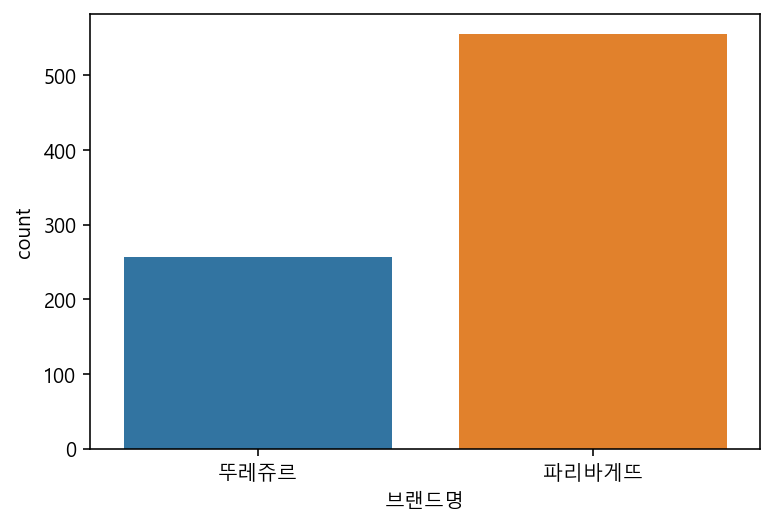

In [56]:
# countplot 으로 브랜드명을 그려봅니다.
sns.countplot(data=df_bread, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

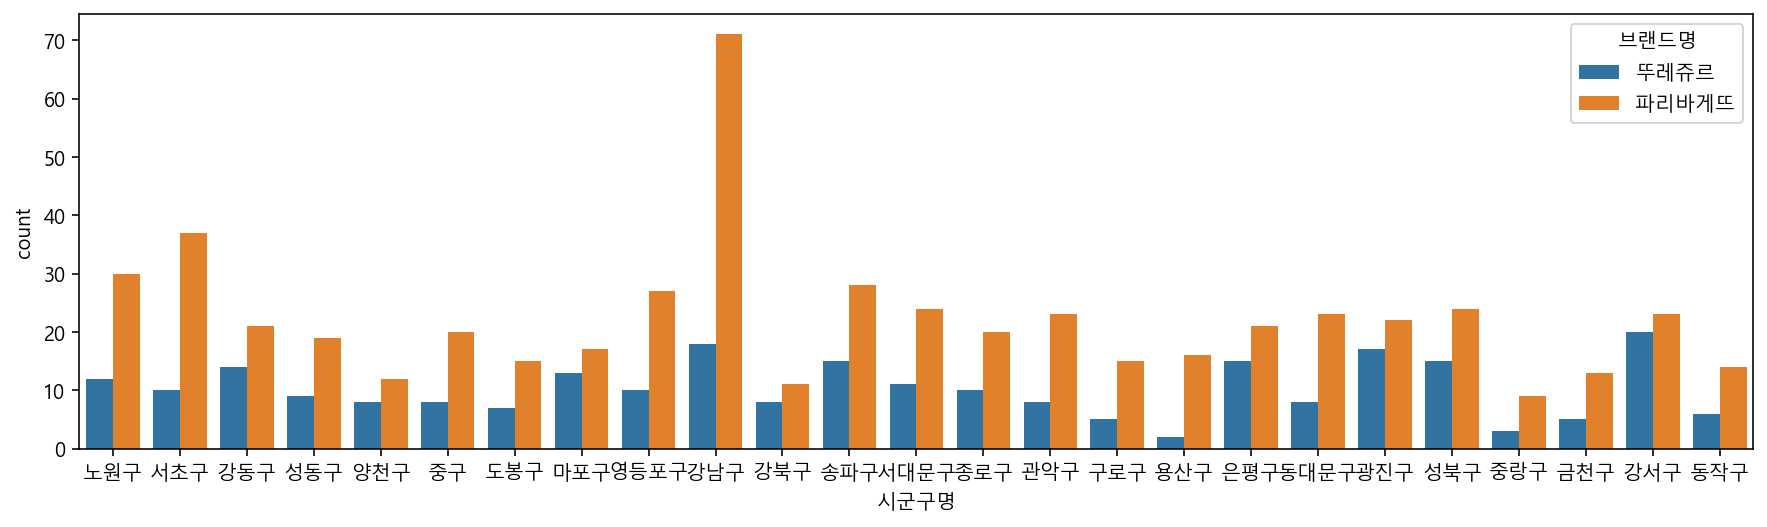

In [61]:
# 시군구별로 브랜드명의 빈도수 차이를 비교합니다.
plt.figure(figsize=(15,4))
sns.countplot(data=df_bread, x='시군구명', hue='브랜드명')

<AxesSubplot:xlabel='경도', ylabel='위도'>

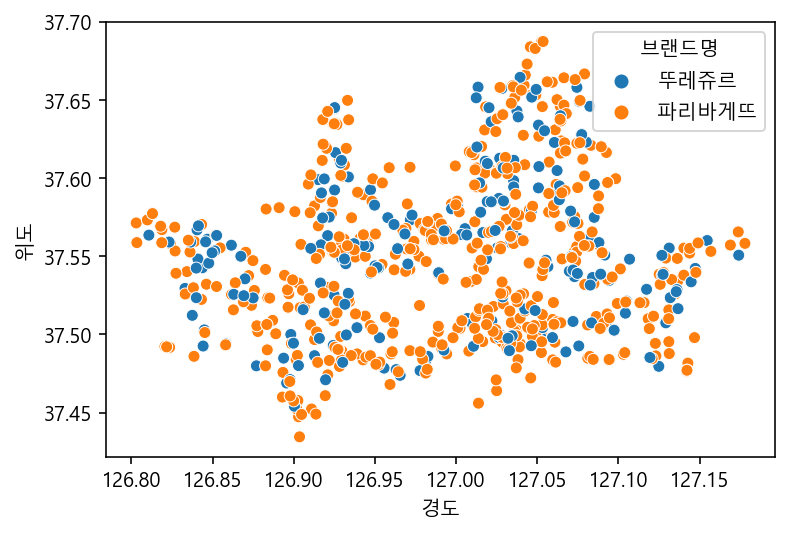

In [62]:
# scatterplot 으로 위경도를 표현해 봅니다.
sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')

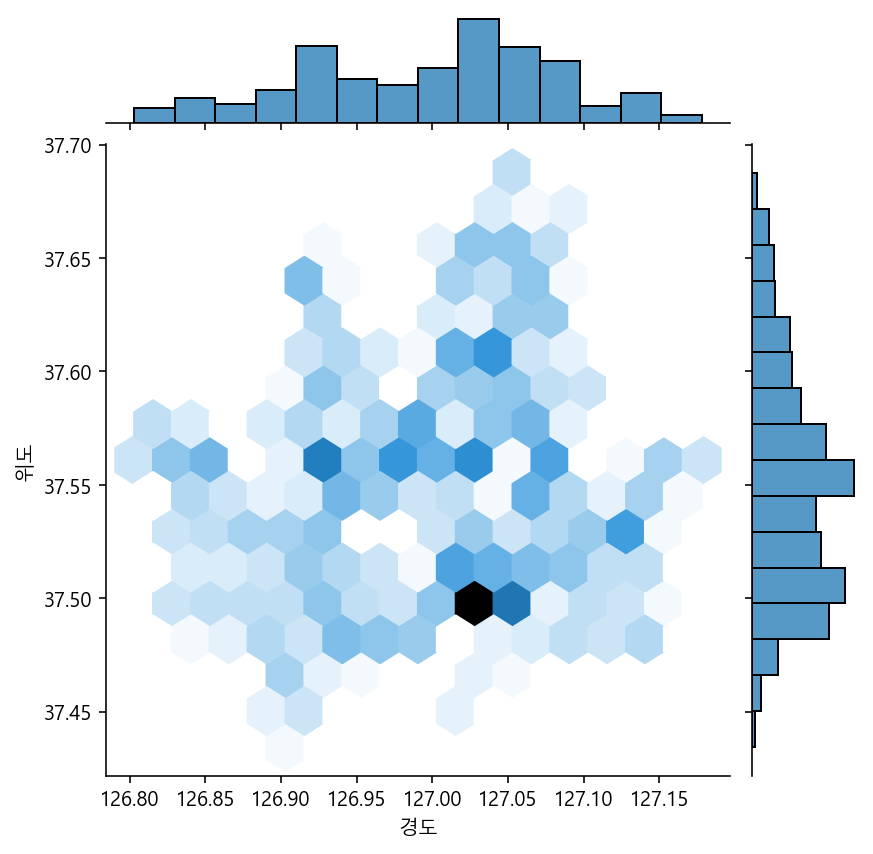

In [63]:
# jointplot 으로 위경도를 표현해 봅니다.
sns.jointplot(data=df_bread, x='경도', y='위도', kind='hex')

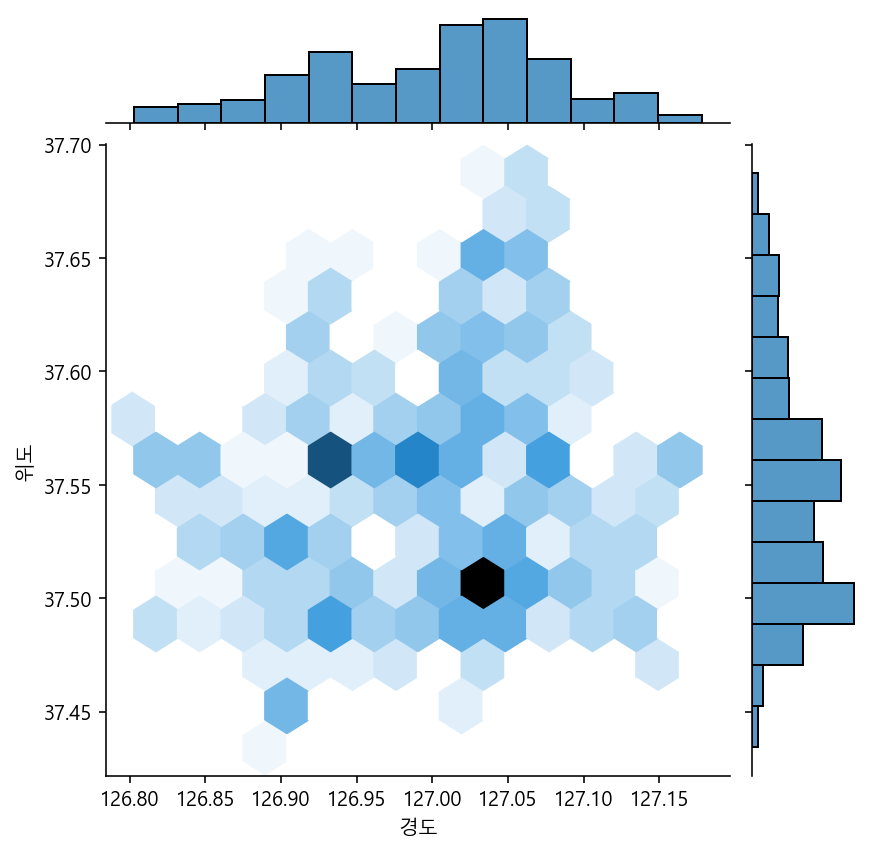

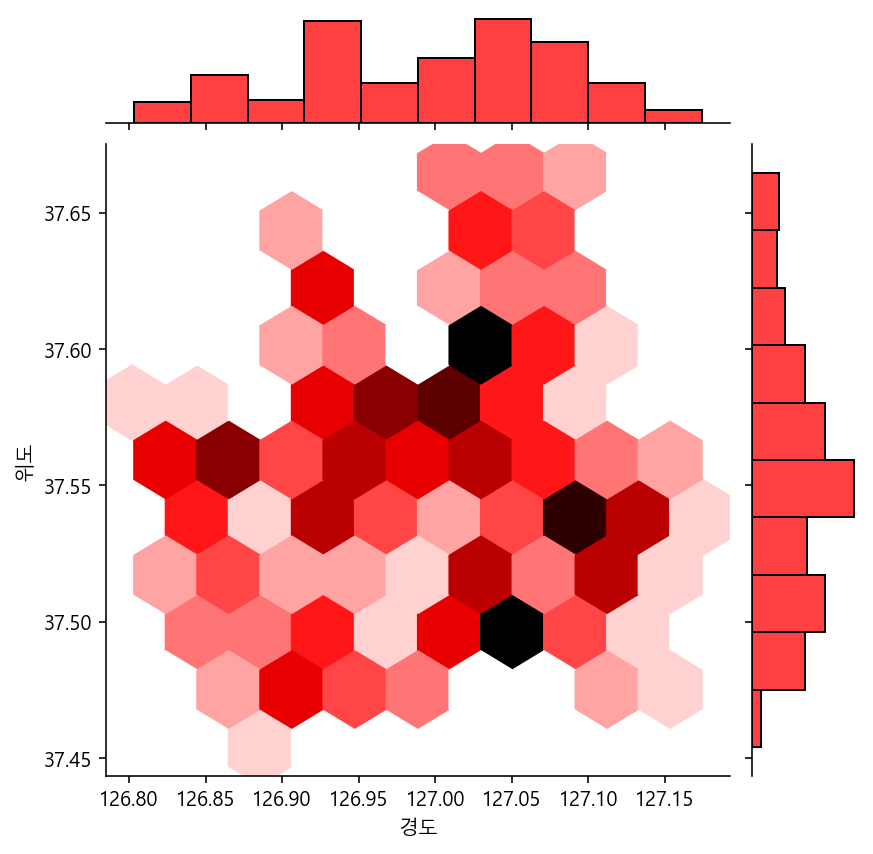

In [65]:
# 파리바게뜨와 뚜레쥬르를 jointplot으로 따로 그려보기 
sns.jointplot(data=df_bread[df_bread['브랜드명']=='파리바게뜨'], x='경도', y='위도', kind='hex')
sns.jointplot(data=df_bread[df_bread['브랜드명']=='뚜레쥬르'], x='경도', y='위도', kind='hex', color='red')

## 지도에 표현하기
### Marker 로 위치를 찍어보기

In [67]:
df_bread.index

Int64Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,
             14897,  15019,
            ...
            544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810,
            569327, 569479],
           dtype='int64', length=812)

In [75]:
m = folium.Map([lat, long], zoom_start=12, tiles='stamen toner') # 기본 위치 정하는 것. tiles도 OpenStreetMap 아닌 다른 걸로 해봄. 

for i in df_bread.index[:100]:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    tooltip = df_bread.loc[i, '상호명']+' - '+df_bread.loc[i,'도로명주소'] 
    icon_color = 'blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color = 'green'
    
    folium.CircleMarker(
        [sub_lat, sub_long],
        radius =5,
        color = icon_color, #CircleMarker 아닌 그냥 Marker는 'icon=folium.Icon(color=icon_color)'으로 아이콘 컬러를 변경함
        popup=f'<i>{title}</i>',
        tooltip=tooltip).add_to(m)

m.save('index.html')
m

### MarkerCluster 로 표현하기
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MarkerCluster.ipynb

In [76]:
# from folium.plugins import MarkerCluster -> 위에서 이미 불러왔기에 주석처리(베라,던킨할 때)

m = folium.Map([lat, long], zoom_start=12, tiles='stamen toner')  
marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index[:100]:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    tooltip = df_bread.loc[i, '상호명']+' - '+df_bread.loc[i,'도로명주소'] 
    icon_color = 'blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color = 'green'
    
    folium.CircleMarker(
        [sub_lat, sub_long],
        radius =5,
        color = icon_color, #CircleMarker 아닌 그냥 Marker는 'icon=folium.Icon(color=icon_color)'으로 아이콘 컬러를 변경함
        popup=f'<i>{title}</i>',
        tooltip=tooltip).add_to(marker_cluster)

m.save('index.html')
m

### Heatmap 으로 그리기
https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Heatmap.ipynb

In [77]:
# heatmap 예제 이해하기 (위의 링크 들어가서 맨 위의 코드 복사해서 붙여넣기)
data = (
    np.random.normal(size=(100, 3)) * np.array([[1, 1, 1]]) + np.array([[48, 5, 1]])
).tolist()
data[:5]

[[48.138214587953094, 2.82774630875092, -0.3436274691095078],
 [48.82482496525485, 4.637306494691713, -0.28121700032987995],
 [47.59146634248892, 7.191178983760542, 1.4497878585087225],
 [47.29519625958188, 7.71785631841428, 1.705119942564651],
 [48.30718747194146, 3.7143652777750695, 0.5331363254856456]]

In [97]:
# heatmap 예제와 같은 형태로 데이터 2차원 배열 만들기
heat = df_bread[['위도','경도','브랜드명']].copy()
heat['브랜드명'] = heat['브랜드명'].replace('뚜레쥬르', 1).replace('파리바게뜨',1) 
# '브랜드명'마다 가중치를 주고 싶을 땐 숫자를 달리 하면 됨
heat = heat.values #ndarray 형태로 바꿔줌

In [98]:
heat[:5]

array([[ 37.62828881, 127.07729473,   1.        ],
       [ 37.49809817, 127.02590362,   1.        ],
       [ 37.53415376, 127.13650069,   1.        ],
       [ 37.66136731, 127.059227  ,   1.        ],
       [ 37.63991755, 127.06424515,   1.        ]])

In [99]:
# HeatMap 그리기
import folium
from folium.plugins import HeatMap
m = folium.Map([lat, long], tiles="stamentoner", zoom_start=12)
HeatMap(heat).add_to(m)
m.save('Heatmap.html')
m

In [100]:
# HeatMap에 Marker를 더해서 파리바게뜨와 뚜레쥬르 구분해서 그리기
m = folium.Map([lat, long], tiles="stamentoner", zoom_start=12)

for i in df_bread.index[:100]:
    sub_lat = df_bread.loc[i, '위도']
    sub_long = df_bread.loc[i, '경도']
    tooltip = df_bread.loc[i, '상호명']+' - '+df_bread.loc[i,'도로명주소'] 
    icon_color = 'blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color = 'green'
    
    folium.CircleMarker(
        [sub_lat, sub_long],
        radius =5,
        color = icon_color, #CircleMarker 아닌 그냥 Marker는 'icon=folium.Icon(color=icon_color)'으로 아이콘 컬러를 변경함
        popup=f'<i>{title}</i>',
        tooltip=tooltip).add_to(m)

HeatMap(heat).add_to(m)
m.save('Heatmap_marker.html')
m
